In [63]:
#https://www.youtube.com/watch?v=QIUxPv5PJOY
#LSTM program (Long Short Term Memory)

In [64]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [65]:
#get the stock quote 
df = web.DataReader('AAPL', data_source= 'yahoo', start= "2015-01-01", end = "2021-03-30")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539
...,...,...,...,...,...,...
2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500.0,120.089996
2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999


In [66]:
#get the number of colums and rows in the dataset
df.shape


(1571, 6)

Text(0, 0.5, 'Closing price USD ($)')

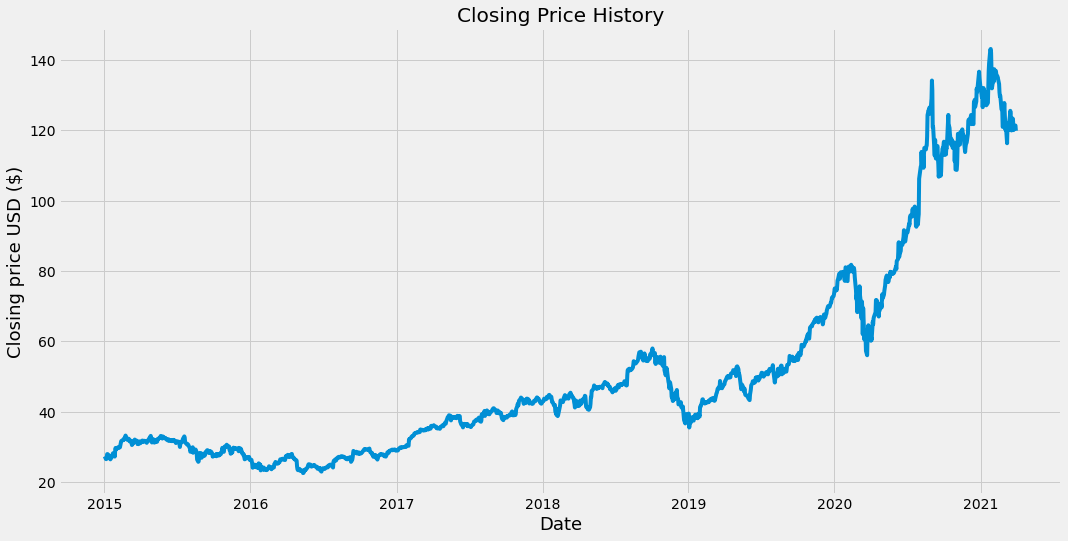

In [67]:
#vizualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing price USD ($)", fontsize = 18)

In [68]:
#create new dataframe with only closing price
data = df.filter(['Close'])
#convert the dataframe to a numpy frame
dataset = data.values
#get the number of rows to the model on (80% data, roundup)
training_data_len = math.ceil(len(dataset) * .8)

training_data_len



1257

In [69]:
#scale the data - minum and maximum 
#https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization#:~:text=5%20mins%20read,while%20using%20machine%20learning%20algorithms.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.8179556 ],
       [0.81944845],
       [0.80709101]])

In [70]:
#create the training data set
#create the scale training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #60 values position 0 to 60
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03982999, 0.04573918, 0.04694175,
       0.04719055, 0.03897989, 0.05177276, 0.05921626, 0.05560856,
       0.05865644, 0.05869791, 0.0605847 , 0.0613726 , 0.05927846,
       0.06091645, 0.06568526, 0.07161518, 0.07489115, 0.07617666,
       0.07773171, 0.07957703, 0.07901721, 0.08119428, 0.08845118,
       0.08673025, 0.07972216, 0.0831018 , 0.07903796, 0.08034418,
       0.08090401, 0.07920381, 0.07478749, 0.07518142, 0.07630106,
       0.07084803, 0.06614141, 0.07072361, 0.06894049, 0.07176031,
       0.07609372, 0.07905868, 0.07704749, 0.07373005, 0.0764462 ,
       0.07536804, 0.06850508, 0.0702882 , 0.06823554, 0.07470455])]
[0.07068215358294894]

[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03

In [71]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
#reshape the data - 3 dimensional data (LST expecting 3 dimesional data) - number of colums and rows
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(1197, 60, 1)

In [73]:
#build the LST model - 50 neurons
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
#Train the model - fit other name for train
model.fit(x_train, y_train, batch_size=1, epochs=1)

1197/1197 [==============================] - 54s 42ms/step - loss: 0.0011


In [76]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [77]:
#create the testing data set
#create a new array containing scaled values from index= 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [78]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [79]:
#3 dimensional data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [80]:
#get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [81]:
#evaluate the model
#get the root mean squarred error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9353482799165568

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


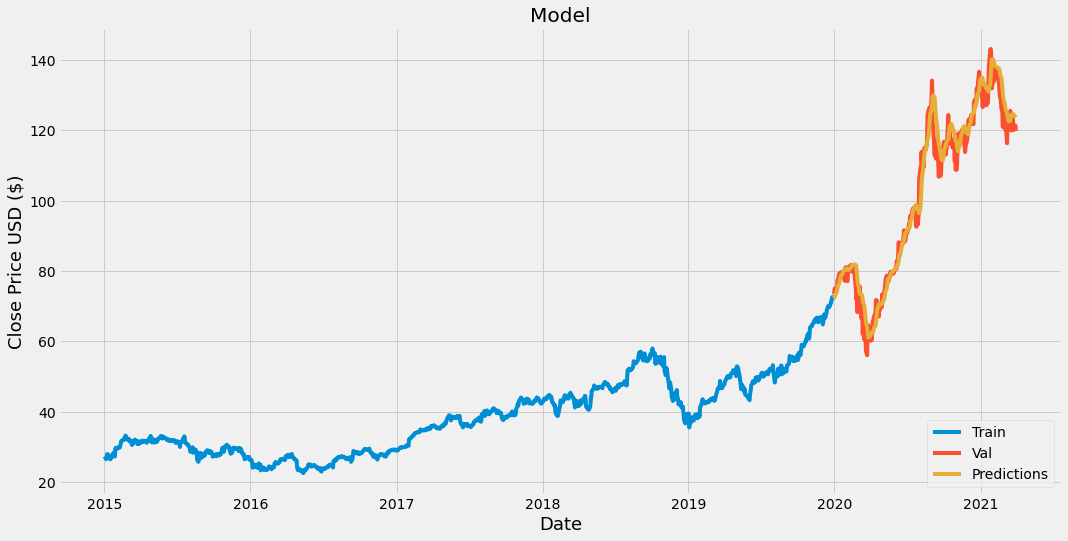

In [82]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()



In [83]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-31,73.412498,72.239311
2020-01-02,75.087502,72.712036
2020-01-03,74.357498,73.310020
2020-01-06,74.949997,73.853813
2020-01-07,74.597504,74.375511
...,...,...
2021-03-24,120.089996,124.587685
2021-03-25,120.589996,124.373375
2021-03-26,121.209999,124.092178


In [86]:
#predict the price for exact date
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-03-31')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to and array
last_60_days = new_df[-60:].values
#Scale the data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create and empty list
X_test = []
#Apppend the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data to numpy array
X_test = np.array(X_test)
#Reshape to 3 dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[123.3792]]
